In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# from subprocess import check_output
# print(check_output(["ls", "../imput"]).decode("utf8"))

In [41]:
df_pima = pd.read_csv('../diabetes/data/diabetes.csv')
df_pima.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [3]:
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df_pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There's no missing value but some of the values are zeroes. We should change the 0s with NaNs.

In [5]:
df_pima['Glucose'] = df_pima['Glucose'].replace(0, np.nan)
df_pima['BloodPressure'] = df_pima['BloodPressure'].replace(0, np.nan) 
df_pima['SkinThickness'] = df_pima['SkinThickness'].replace(0, np.nan) 
df_pima['Insulin'] = df_pima['Insulin'].replace(0, np.nan)        
df_pima['BMI'] = df_pima['BMI'].replace(0, np.nan) 
df_pima['DiabetesPedigreeFunction'] = df_pima['DiabetesPedigreeFunction'].replace(0, np.nan) 
df_pima['Age'] = df_pima['Age'].replace(0, np.nan) 

df_pima.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


In [6]:
df_pima.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Filling Missing Values

In [7]:
df_pima['BMI'].fillna(df_pima['BMI'].median(), inplace=True)
df_pima['Glucose'].fillna(df_pima['Glucose'].median(), inplace=True)
df_pima['BloodPressure'].fillna(df_pima['BloodPressure'].median(), inplace=True)
df_pima['SkinThickness'].fillna(df_pima['SkinThickness'].median(), inplace=True)
df_pima['Insulin'].fillna(df_pima['Insulin'].median(), inplace=True)

df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Correlation Plot

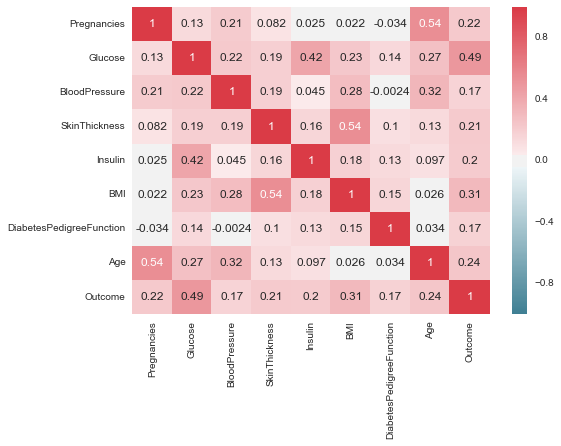

In [8]:
corr = df_pima[df_pima.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True)
plt.show()

# Features

In [27]:
X_features = pd.DataFrame(data=df_pima, columns=["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age","SkinThickness"])
X_features.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThickness
0,6,148.0,72.0,125.0,33.6,0.627,50,35.0
1,1,85.0,66.0,125.0,26.6,0.351,31,29.0
2,8,183.0,64.0,125.0,23.3,0.672,32,29.0
3,1,89.0,66.0,94.0,28.1,0.167,21,23.0
4,0,137.0,40.0,168.0,43.1,2.288,33,35.0


In [28]:
Y = df_pima.iloc[:,8]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Standard Scaling

In [29]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)
X_features

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.46849198,
         1.4259954 ,  0.67064253],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.36506078,
        -0.19067191, -0.01230129],
       [ 1.23388019,  2.01666174, -0.69376149, ...,  0.60439732,
        -0.10558415, -0.01230129],
       ..., 
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.68519336,
        -0.27575966, -0.69524511],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.37110101,
         1.17073215, -0.01230129],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.47378505,
        -0.87137393,  0.21534665]])

# Split Data: Training & Testing

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size=0.25, random_state=33)

# Classification Models


In [43]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear",C=0.2)))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=5)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("Extra Tree Classifier:",ExtraTreesClassifier()))

print('Models appended...')

Models appended...


# Results

In [44]:
from sklearn.metrics import classification_report

results = []
names = []
for name,model in models:
    model.fit(X_train, Y_train)
    cv_result = model.score(X_test, Y_test)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 73.9583333333
Naive Bayes: 71.875
K-Nearest Neighbour: 72.3958333333
Decision Tree: 72.3958333333
Support Vector Machine-linear: 74.4791666667
Support Vector Machine-rbf: 74.4791666667
Random Forest: 71.875
eXtreme Gradient Boost: 73.4375
Extra Tree Classifier: 75.0


# Ensemble

In [45]:
# class Ensemble(object):
#     def __init__(self, n_folds, stacker, base_models):
#         self.n_folds = n_folds
#         self.stacker = stacker
#         self.base_models = base_models
        
#     def fit_predict(self, X, y, T):
#         X = np.array(X)
#         y = np.array(y)
#         T = np.array(T)
        
#         folds = list(KFold(len(y), n_folds=self.n_folds, shuffle=True, random_state=2016))
        
#         S_train = np.zeros((X.shape[0], len(self.base_models)))
#         S_test = np.zeros((T.shape[0], len(self.base_models)))
        
#         for i, clf in enumerate(self.base_models):
#             S_test_i = np.zeros(T.shape[0], len(folds))
            
#             for j, (train_idx, test_idx) in enumerate(folds):
#                 X_train = X[train_idx]
#                 y_train = y[train_idx]
#                 X_holdout = X[test_idx]
#                 # y_holdout = y[test_idx]
#                 clf.fit(X_train, y_train)
#                 y_pred = clf.predict(X_holdout)[:]
#                 S_train[test_idx, i] = y_pred
#                 S_test_i[:, j] = clf.predict(T)[:]
                
#             S_test[:, i] = S_test_i.mean(1)
            
#         self.stacker.fit(S_train, y)
#         y_pred = self.stacker.predict(S_test)[:]
#         return y_pred
    

In [46]:
# kk = Ensemble(n_folds=8, stacker=LogisticRegression, base_models=models)
# print(kk.fit_predict(X_train, Y_train, Y_test))


In [47]:
from sklearn.cross_validation import KFold
class Ensemble(object):
    def __init__(self, n_folds, stacker, base_models):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models
        
    def fit_predict(self, x, y, t):
        x = np.array(x)
        y = np.array(y)
        t = np.array(t)
        
        folds = list(KFold(len(y), n_folds=self.n_folds, shuffle=True, 
                           random_state=2017))
        
        # prepare train and test sets
        s_train = np.zeros((x.shape[0], len(self.base_models)))
        s_test = np.zeros((t.shape[0], len(self.base_models)))
        
        for i, clf in enumerate(self.base_models):
            
            s_test_i = np.zeros((t.shape[0], len(folds)))
            
            for j, (train_idx, test_idx) in enumerate(folds):
                x_train = x[train_idx]
                y_train = y[train_idx]
                x_holdout = x[test_idx]
                # y_holdout = y[test_idx]
                clf.fit(x_train, y_train)
                y_pred = clf.predict(x_holdout)[:]
                s_train[test_idx, i] = y_pred
                s_test_i[:, j] = clf.predict(t)[:]
            s_test[:, i] = s_test_i.mean(1)
        self.stacker.fit(s_train, y)
        y_pred = self.stacker.predict(s_test)[:]
        return y_pred

In [51]:
lr = LogisticRegression()
gnb = GaussianNB()
knc = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier()
svcl = SVC(kernel="linear",C=0.2)
svcr = SVC(kernel="rbf")
rfc = RandomForestClassifier(n_estimators=5)
xgbc = XGBClassifier()

from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier()

In [53]:
ensemble = Ensemble(n_folds=3, stacker=extra_trees, 
                    base_models=[lr, gnb, knc, dtc, svcl, svcr, rfc, xgbc])

y_test_t = tvect.transform(Y_test)
y_prediction = ensemble.fit_predict(X_train, Y_train, Y_test)
print(y_prediction)

NameError: name 'tvect' is not defined